<a href="https://colab.research.google.com/github/manpreet1325/cap-comp215/blob/main/FinalCopy_of_chap04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Erdos-Renyi Graphs

Name- Manpreet Kaur

Code examples from [Think Complexity, 2nd edition](https://thinkcomplex.com).

Copyright 2016 Allen Downey, [MIT License](http://opensource.org/licenses/MIT)

In [133]:
import os

if not os.path.exists('utils.py'):
    !wget https://raw.githubusercontent.com/AllenDowney/ThinkComplexity2/master/notebooks/utils.py

%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import seaborn as sns

from utils import decorate

# I set the random seed so the notebook
# produces the same results every time.
np.random.seed(17)

# TODO: remove this when NetworkX is fixed
from warnings import simplefilter
import matplotlib.cbook
simplefilter("ignore", matplotlib.cbook.mplDeprecation)

In [134]:
# node colors for drawing networks
colors = sns.color_palette('pastel', 5)
#sns.palplot(colors)
sns.set_palette(colors)

## Directed graph

The first example is a directed graph that represents a social network with three nodes.

In [135]:
G = nx.DiGraph()
G.add_node('John')
G.add_node('Alice')
G.add_node('Bob')
G.add_node('Chuck')
list(G.nodes())

['John', 'Alice', 'Bob', 'Chuck']

Here's how we add edges between nodes.

In [136]:
G.add_edge('Alice', 'Bob')
G.add_edge('Alice', 'Chuck')
G.add_edge('Bob', 'Alice')
G.add_edge('Bob', 'Chuck')
G.add_edge('John','Bob')
G.add_edge('John','Alice')
list(G.edges())

[('John', 'Bob'),
 ('John', 'Alice'),
 ('Alice', 'Bob'),
 ('Alice', 'Chuck'),
 ('Bob', 'Alice'),
 ('Bob', 'Chuck')]

And here's how to draw the graph.

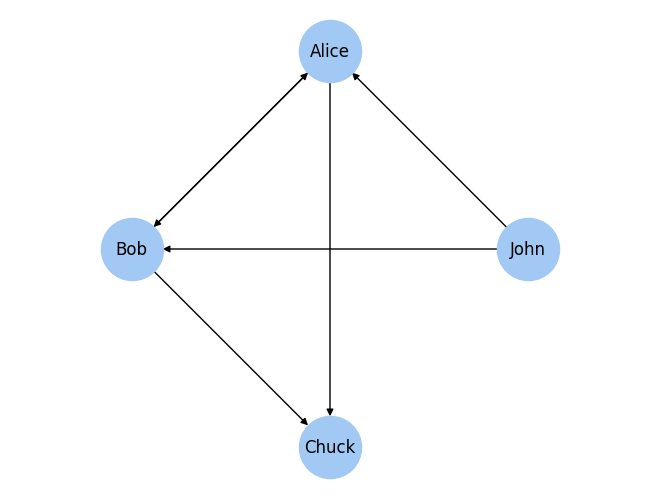

In [137]:
nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.show('figs/chap03-1')

**Exercise:**  Add another node and a few more edges and draw the graph again.

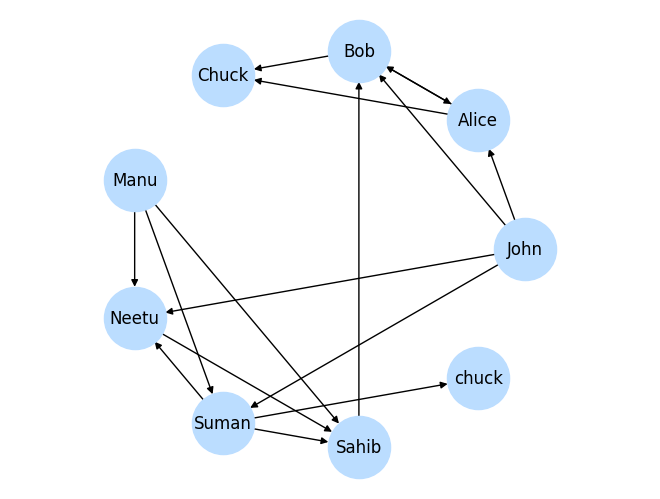

In [138]:
G.add_node('Manu')
G.add_node('Neetu')
G.add_node('Suman')
G.add_node('Sahib')
G.add_edge('Manu', 'Neetu')
G.add_edge('Manu', 'Suman')
G.add_edge('John','Neetu')
G.add_edge('John','Suman')
G.add_edge('Suman', 'Neetu')
G.add_edge('Suman', 'chuck')
G.add_edge('Suman', 'Sahib')
G.add_edge('Manu', 'Sahib')
G.add_edge('Neetu', 'Sahib')
G.add_edge('Sahib', 'Bob')


nx.draw_circular(G,
                 node_color='#bbddff',
                 node_size=2000,
                 with_labels=True)
plt.axis('equal')
plt.show()

## Undirected graph

The second example is an undirected graph that represents cities and the driving times between them.

`positions` is a dictionary that maps from each city to its coordinates.

In [139]:
positions = dict(Albany=(-74, 43),
                 Boston=(-71, 42),
                 NYC=(-74, 41),
                 Philly=(-75, 40))

positions['Albany']

(-74, 43)

We can use the keys in `pos` to add nodes to the graph.

In [140]:
G = nx.Graph()
G.add_nodes_from(positions)
G.nodes()

NodeView(('Albany', 'Boston', 'NYC', 'Philly'))

`drive_times` is a dictionary that maps from pairs of cities to the driving times between them.

In [141]:
drive_times = {('Albany', 'Boston'): 3,
               ('Albany', 'NYC'): 4,
               ('Boston', 'NYC'): 4,
               ('NYC', 'Philly'): 2}

We can use the keys from `drive_times` to add edges to the graph.

In [142]:
G.add_edges_from(drive_times)
G.edges()

EdgeView([('Albany', 'Boston'), ('Albany', 'NYC'), ('Boston', 'NYC'), ('NYC', 'Philly')])

Now we can draw the graph using `positions` to indicate the positions of the nodes, and `drive_times` to label the edges.

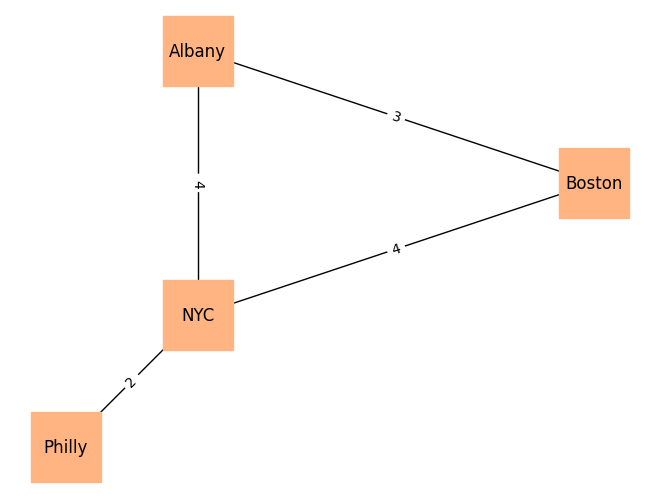

In [143]:
nx.draw(G, positions,
        node_color='C1',
        node_shape='s',
        node_size=2500,
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions,
                             edge_labels=drive_times)

plt.axis('equal')
plt.show('figs/chap03-2')

**Exercise:**  Add another city and at least one edge.

In [144]:
positions = dict(NorthVan=(5, 5),
                 Burnaby=(7, 1),
                 Vancouver=(0, 0),
                 Squamish = (4,-3 ),
                 Richmond = (5,8))


In [145]:
G = nx.Graph()
G.add_nodes_from(positions)
G.nodes()

NodeView(('NorthVan', 'Burnaby', 'Vancouver', 'Squamish', 'Richmond'))

In [146]:
drive_times = {('NorthVan', 'Burnaby'): 20,
               ('NorthVan', 'Vancouver'): 35,
               ('Burnaby', 'Vancouver'): 15,
               ('Vancouver', 'Richmond'): 25,
               ('Vancouver', 'Squamish'): 45,
               ('Squamish','Burnaby'): 25}

In [147]:
G.add_edges_from(drive_times)
G.edges()

EdgeView([('NorthVan', 'Burnaby'), ('NorthVan', 'Vancouver'), ('Burnaby', 'Vancouver'), ('Burnaby', 'Squamish'), ('Vancouver', 'Richmond'), ('Vancouver', 'Squamish')])

nx.draw_circular(G,
                 node_color='C0',
                 node_size=2000,
                 with_labels=True)

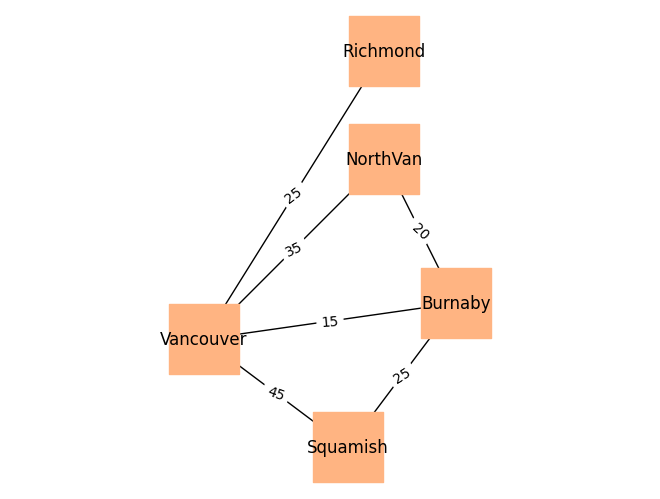

In [148]:
nx.draw(G,positions,
        node_color='C1',
        node_shape='s',
        node_size=2500,
        with_labels=True)

nx.draw_networkx_edge_labels(G, positions,
                             edge_labels=drive_times)

plt.axis('equal')
plt.show('figs/chap03-2')

## Complete graph

To make a complete graph, we use a generator function that iterates through all pairs of nodes.

In [149]:
def all_pairs(nodes):
  return ((a, b) for i in range(1, len(nodes)) for a,b in zip(nodes, nodes[i:]))


`make_complete_graph` makes a `Graph` with the given number of nodes and edges between all pairs of nodes.

In [150]:
def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

Here's a complete graph with 10 nodes:

In [151]:
complete = make_complete_graph(10)
complete.number_of_nodes()

10

And here's what it looks like.

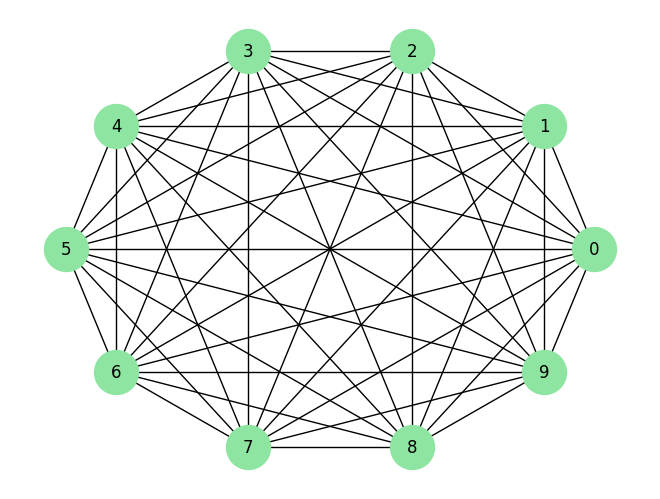

In [152]:
nx.draw_circular(complete,
                 node_color='C2',
                 node_size=1000,
                 with_labels=True)
plt.show('figs/chap03-3')

The `neighbors` method the neighbors for a given node.

In [153]:
list(complete.neighbors(0))

[1, 2, 3, 4, 5, 6, 7, 8, 9]

**Exercise:** Make and draw complete directed graph with 5 nodes.

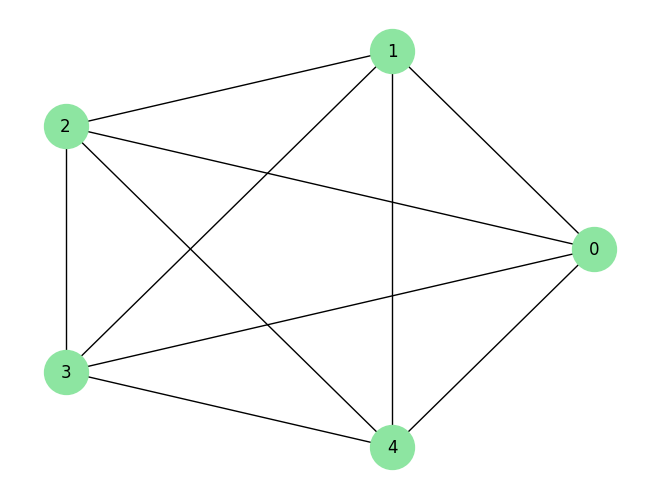

[1, 2, 3, 4]

In [154]:
def all_pairs(nodes):
  return ((a, b) for i in range(1, len(nodes)) for a,b in zip(nodes, nodes[i:]))


def make_complete_graph(n):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(all_pairs(nodes))
    return G

complete = make_complete_graph(5)

nx.draw_circular(complete,
                 node_color='C2',
                 node_size=1000,
                 with_labels=True)
plt.show('figs/chap03-3')

list(complete.neighbors(0))


## Random graphs

Next we'll make a random graph where the probability of an edge between each pair of nodes is $p$.

The helper function `flip` returns True with probability `p` and False with probability `1-p`

In [155]:
def flips(p):
    return np.random.random() < p

`random_pairs` is a generator function that enumerates all possible pairs of nodes and yields each one with probability `p`

The rewritten generator version of the loop and yeild funcion is as:

In [156]:
def random_pairs(nodes, p):
    return(edge for edge in all_pairs(nodes) if flips(p)==True)


`make_random_graph` makes an ER graph where the probability of an edge between each pair of nodes is `p`.

In [157]:
def make_random_graph(n, p):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(random_pairs(nodes, p))
    return G

Here's an example with `n=10` and `p=0.3`

In [158]:
np.random.seed(10)

random_graph = make_random_graph(10, 0.3)
len(random_graph.edges())

12

And here's what it looks like:

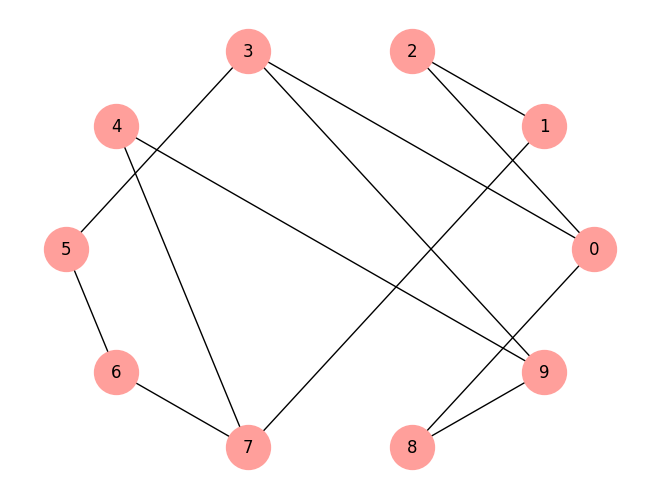

In [159]:
nx.draw_circular(random_graph,
                 node_color='C3',
                 node_size=1000,
                 with_labels=True)
plt.show('figs/chap02-4')

**Exercise 4**

[]

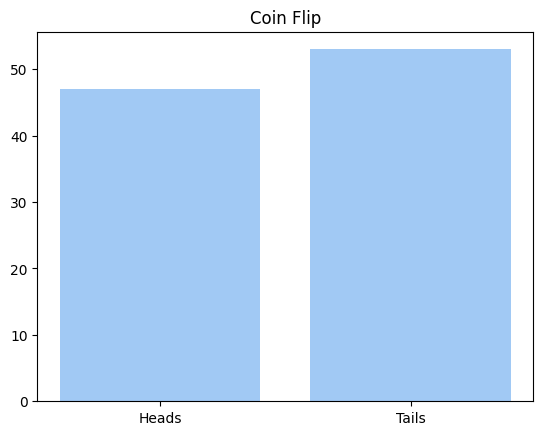

In [160]:
flip_s=[flips(0.5) for n in range(0,100)]

def count(value, data):
 """ return a count of the number of times value occurs in data """
 return sum(1 for v in data if v==value)

fig, ax = plt.subplots()
ax.set_title("Coin Flip")
ax.bar(('Heads', 'Tails'), (count(False, flip_s), count(True, flip_s)))
plt.plot()

#print(data)


[]

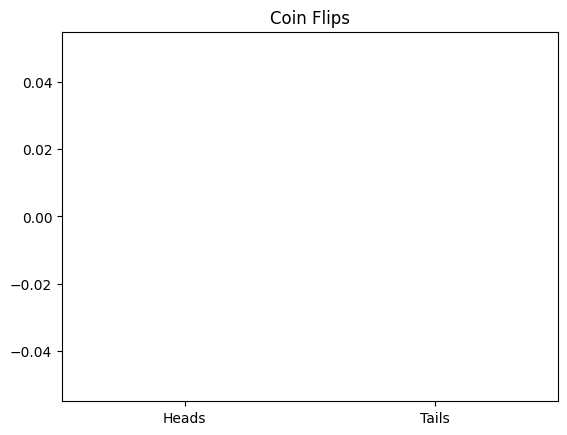

In [161]:
p_range=[0.1*n for n in range(0,10)]


flip_list=[]
for p in p_range:
  flip_list.append(flips(p) for n in range(0,100))



def count(value, data):
 """ return a count of the number of times value occurs in data """
 return sum(1 for v in data if v==value)


fig, ax = plt.subplots()
ax.set_title("Coin Flips")
ax.bar(('Heads', 'Tails'), (count(False, flip_list), count(True, flip_list)))
plt.plot()



## Connectivity

To check whether a graph is connected, we'll start by finding all nodes that can be reached, starting with a given node:

In [162]:
def reachable_nodes(G, start):
    seen = set()
    stack = [start]
    while stack:
        node = stack.pop()
        if node not in seen:
            seen.add(node)
            stack.extend(G.neighbors(node))
    return seen

<Axes: title={'center': 'reachable_node Timings'}, xlabel='Graph Size', ylabel='Execution Time'>

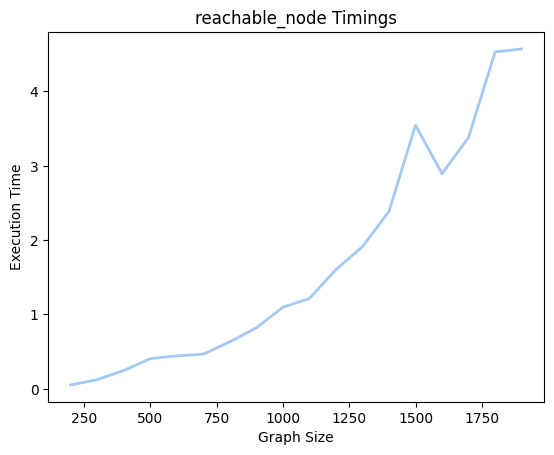

In [163]:
from timeit import timeit
timings=[]

sizes= [x for x in range(200,2000,100)]
for p in range(200,2000,100):
  timings.append(timeit(lambda: reachable_nodes( make_complete_graph(p), 0 ), number=1))
#timings= [timeit(lambda: reachable_nodes( make_complete_graph(range(p)), 0 ), number=1) for p in range(200,2000,100)]

timings

fig, ax = plt.subplots()
ax.plot(sizes, timings)
ax.set_xlabel('Graph Size')
ax.set_ylabel('Execution Time')
ax.set_title("reachable_node Timings")
ax

**Answer** From the graph, it is clear that the time is growing with an increasing slope. From this it is clear that the trend is not linear. We have the number of nodes for the complete graph is n(n-1)/2. Thus we are expecting the agorithm complexity of O(2). The graph is obviously not perfect and changes everytime because of situational changes like internet connection and hardware issues.

In the complete graph, starting from node 0, we can reach all nodes:

In [164]:
reachable_nodes(complete, 0)

{0, 1, 2, 3, 4}

In the random graph we generated, we can also reach all nodes (but that's not always true):

In [165]:
reachable_nodes(random_graph, 0)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

We can use `reachable_nodes` to check whether a graph is connected:

In [166]:
def is_connected(G):
    start = next(iter(G))
    reachable = reachable_nodes(G, start)
    return len(reachable) == len(G)

Again, the complete graph is connected:

In [167]:
is_connected(complete)

True

But if we generate a random graph with a low value of `p`, it's not:

In [168]:
is_connected(random_graph)

True

**Exercise:** What do you think it means for a directed graph to be connected?  Write a function that checks whether a directed graph is connected.

**Answer** The directed graph is said to be connected if every node is connected to every reachable node. A complete graph is always a connected graph.

## Probability of connectivity

Now let's estimare the probability that a randomly-generated ER graph is connected.

This function takes `n` and `p`, generates `iters` graphs, and returns the fraction of them that are connected.

In [169]:
# version with a for loop

def prob_connected(n, p, iters=100):
    count = 0
    for i in range(iters):
        random_graph = make_random_graph(n, p)
        if is_connected(random_graph):
            count += 1
    return count/iters

In [170]:
# version with a list comprehension

def prob_connected(n, p, iters=100):
    tf = [is_connected(make_random_graph(n, p))
          for i in range(iters)]
    return np.mean(tf)

With `n=10` and `p=0.23`, the probability of being connected is about 33%.

In [171]:
np.random.seed(17)

n = 10
prob_connected(n, 0.23, iters=10000)

0.3496

According to Erdos and Renyi, the critical value of `p` for `n=10` is about 0.23.

In [172]:
pstar = np.log(n) / n
pstar

0.23025850929940458

So let's plot the probability of connectivity for a range of values for `p`

In [173]:
ps = np.logspace(-1.3, 0, 11)
ps

array([0.05011872, 0.0676083 , 0.09120108, 0.12302688, 0.16595869,
       0.22387211, 0.30199517, 0.40738028, 0.54954087, 0.74131024,
       1.        ])

I'll estimate the probabilities with `iters=1000`

In [174]:
ys = [prob_connected(n, p, 1000) for p in ps]

for p, y in zip(ps, ys):
    print(p, y)

0.05011872336272722 0.0
0.06760829753919818 0.0
0.09120108393559097 0.005
0.12302687708123815 0.023
0.16595869074375605 0.089
0.22387211385683395 0.307
0.3019951720402016 0.659
0.40738027780411273 0.894
0.5495408738576245 0.998
0.7413102413009173 1.0
1.0 1.0


And then plot them, adding a vertical line at the computed critical value

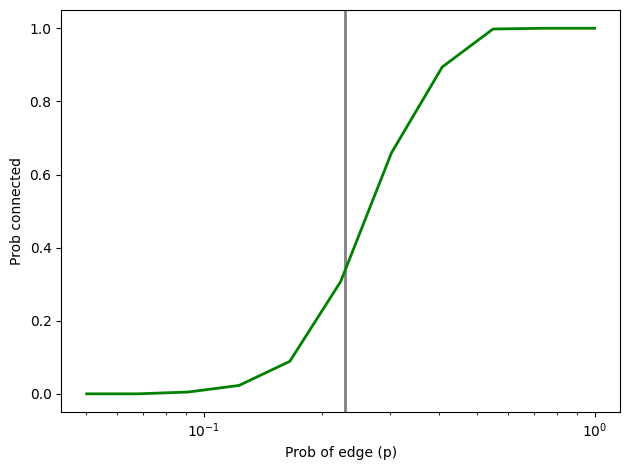

In [175]:
plt.axvline(pstar, color='gray')
plt.plot(ps, ys, color='green')
decorate(xlabel='Prob of edge (p)',
                 ylabel='Prob connected',
                 xscale='log')

plt.show('figs/chap02-5')

We can run the same analysis for a few more values of `n`.

300
100
30


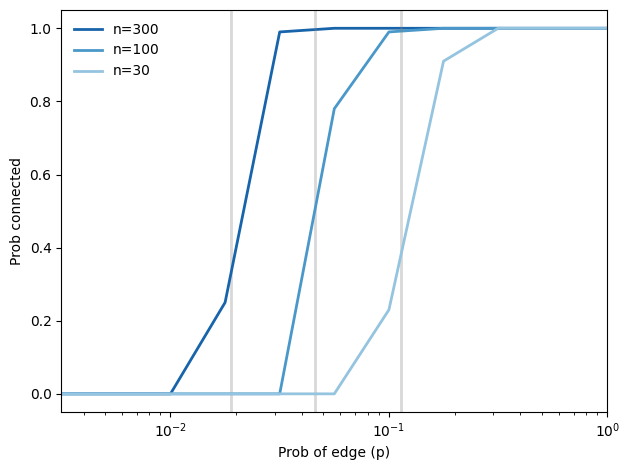

In [176]:
ns = [300, 100, 30]
ps = np.logspace(-2.5, 0, 11)

sns.set_palette('Blues_r', 4)
for n in ns:
    print(n)
    pstar = np.log(n) / n
    plt.axvline(pstar, color='gray', alpha=0.3)

    ys = [prob_connected(n, p) for p in ps]
    plt.plot(ps, ys, label='n=%d' % n)

decorate(xlabel='Prob of edge (p)',
         ylabel='Prob connected',
         xscale='log',
         xlim=[ps[0], ps[-1]],
         loc='upper left')

plt.show('figs/chap02-6')

As `n` increases, the critical value gets smaller and the transition gets more abrupt.

## Exercises

**Exercise:** In Chapter 2 we analyzed the performance of `reachable_nodes` and classified it in $O(n + m)$, where $n$ is the number of nodes and $m$ is the number of edges.  Continuing the
analysis, what is the order of growth for `is_connected`?

    def is_connected(G):
        start = list(G)[0]
        reachable = reachable_nodes(G, start)
        return len(reachable) == len(G)

<Axes: title={'center': 'reachable_node Timings'}, xlabel='Graph Size', ylabel='Execution Time'>

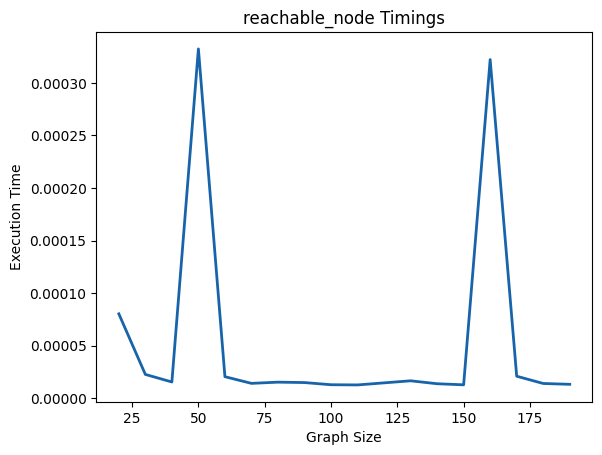

In [177]:
from timeit import timeit
timings=[]

sizes= [x for x in range(20,200,10)]
for p in range(20,200,10):
  timings.append(timeit(lambda:  is_connected(complete), number=1))
#timings= [timeit(lambda: reachable_nodes( make_complete_graph(range(p)), 0 ), number=1) for p in range(20,200,100)]


fig, ax = plt.subplots()
ax.plot(sizes, timings)
ax.set_xlabel('Graph Size')
ax.set_ylabel('Execution Time')
ax.set_title("reachable_node Timings")
ax